# Topic: Prediction of Diabetes Patients

# Objectives

# Load libraries and read the data

In [1]:

import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from collections import OrderedDict
%matplotlib inline
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import  XGBClassifier

In [2]:
df = pd.read_csv(r'C:\Users\Ajay\Desktop\NoteMachine\data_diabetes.csv')

# Data Exploration 

In [4]:
 df.head()

,Pregnancies,Glucose,BloodPressure,SkinThick,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [257]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThick,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1
767,1,93,70,31,0,30.40,0.32,23,0


In [7]:

df.shape

(768, 9)

In [8]:

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
df.isnull().sum()

Preg         0
Glucose      0
BloodPr      0
SkinThick    0
Insulin      0
BMI          0
DP           0
Age          0
Outcome      0
dtype: int64

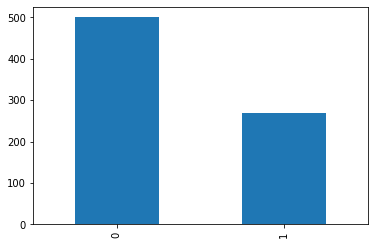

In [12]:

# Visual exploration is the most effective way to extract information between variables.
df['Outcome'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize'] = (6,4)
#df.y.value_counts().plot(kind="barh"

In [15]:

percentage_diabetes = 268*100/(268+500)
percentage_diabetes


34.895833333333336

Text(0.5, 1.0, 'Age')

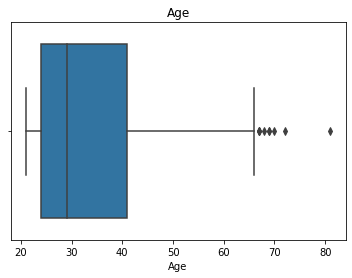

In [18]:

# Impact of the age on the output variables 
g = sns.boxplot(x=df["Age"])
plt.title('Age')

In [22]:

plt.rcParams['figure.figsize'] = (10,6)

Text(0, 0.5, 'Frequency')

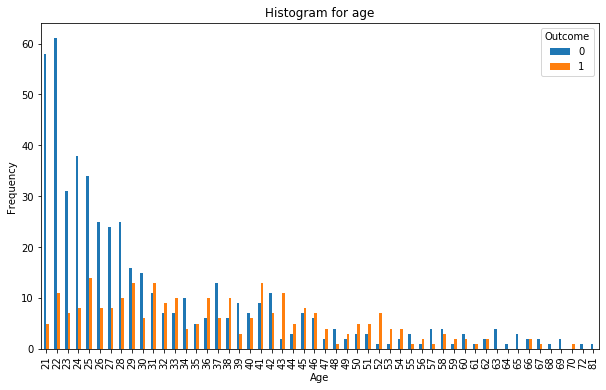

In [23]:

tem = pd.crosstab(df['Age'], df['Outcome'])
tem.plot(kind = 'bar')
plt.title('Histogram for age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Next, I wanted to understand the relationship of my features to my target variable so I plotted a heat map of my features with correlations to Outcome of 0.050 or higher. There is strong direct relationship between Outome and Glucose and BMI

C:\Users\Ajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


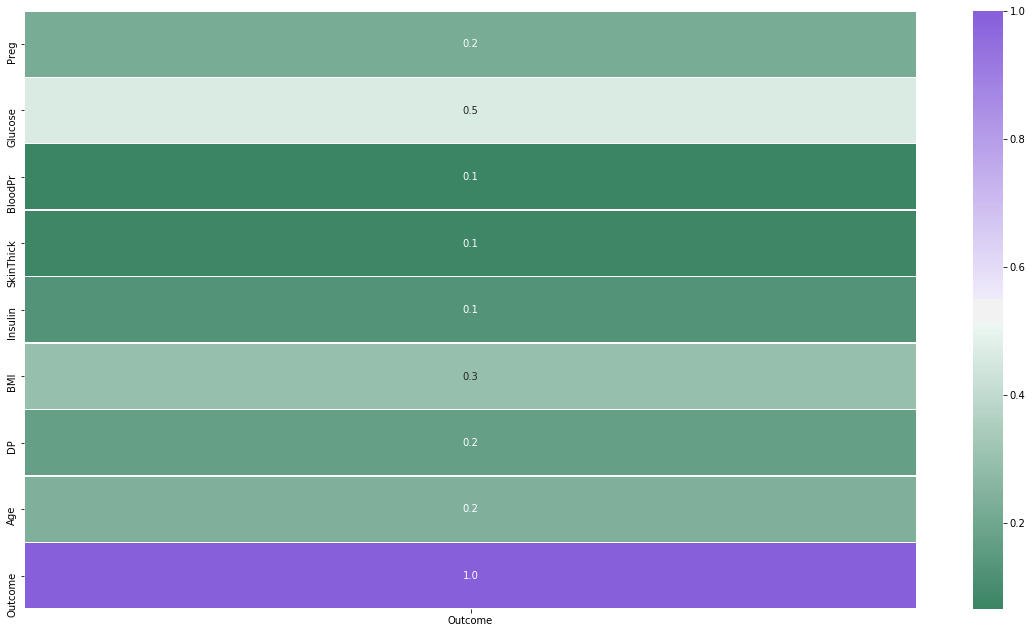

In [123]:
fig, ax = plt.subplots(figsize = (20, 11))

cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(df.corr()[['Outcome']][round(df.corr()['Outcome'].sort_values(ascending=False), 1) >= .05], annot=True, linewidths=.4, fmt=".1f", cmap=cmap, ax=ax);




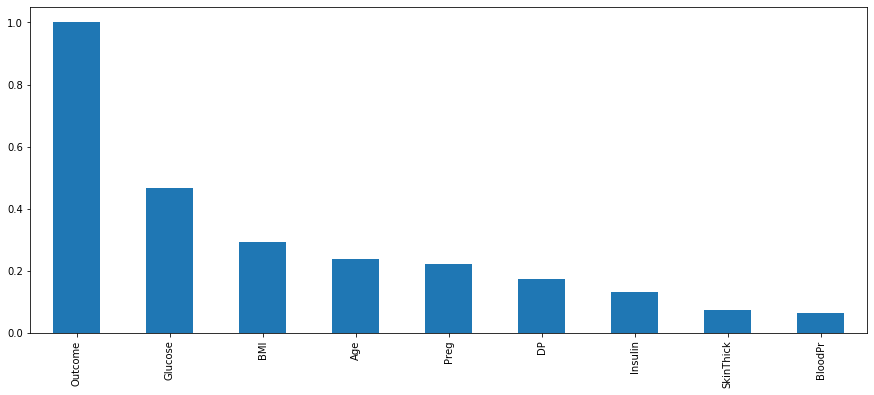

In [47]:
plt.figure(figsize=(15,6))
df.corr()['Outcome'].sort_values(ascending=False).plot.bar()

In [ ]:
From above table, we have more than 8 variables. The question is that, would all these variable be relevant for our model? our concens is that, we don't want to include irrelevant variable in building our model, because existence of the irrelevant variables will exagerate the result. In this case,the training model will be inconsistence and less precise. To identify irrelevant variables and select important variables for the predictive model, the following tests are considered for variable selection.
Weight of evidence (WOE) and Information value (IV) 
Random Forest
Recursive Feature Elimination
Chi Square test
Linear Support Vector Classificatio
Extratrees Classifier
Note that, we combined all these tests because each of the test has advantage and disadvantage 

In [127]:

features = df.drop('Outcome',axis=1)
labels = df['Outcome']

# Feature selection using Weight of evidence (WOE) and Information value (IV)


In [44]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [45]:
final_iv, IV = data_vars(df, df.Outcome)

In [46]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
4,Glucose,1.284718
1,BMI,0.553820
0,Age,0.509065
6,Preg,0.230562
3,DP,0.123829
2,BloodPr,0.095890
7,SkinThick,0.077671
5,Insulin,0.004733


# Feature Selection Using Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)preds = clf.predict(features)


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9934895833333334


In [49]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [50]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
1,Glucose,0.267128
5,BMI,0.162117
7,Age,0.140121
6,DP,0.121043
0,Preg,0.089754
2,BloodPr,0.089485
4,Insulin,0.072514
3,SkinThick,0.057837


# Recursive Feature Elimination using LogisticRegression

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [53]:
Selected[Selected['RFE'] == True]

,index,RFE
0,Preg,True
1,Glucose,True
2,BloodPr,True
3,SkinThick,True
4,Insulin,True
5,BMI,True
6,DP,True
7,Age,True


# Feature importance with ExtraTreesClassifier

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.10426123 0.22673239 0.09744056 0.07540567 0.07356162 0.142398
 0.12183133 0.1583692 ]


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [56]:
FI = FI.reset_index()

In [58]:
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
1,Glucose,0.226732
7,Age,0.158369
5,BMI,0.142398
6,DP,0.121831
0,Preg,0.104261
2,BloodPr,0.097441
3,SkinThick,0.075406
4,Insulin,0.073562


# Feature selection using Chi Sequre

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [60]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [61]:
chi_sq = chi_sq.reset_index()

In [62]:
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
4,Insulin,2175.57
1,Glucose,1411.89
7,Age,181.30
5,BMI,127.67
0,Preg,111.52
3,SkinThick,53.11
2,BloodPr,17.61
6,DP,5.39


# Linear Support Vector Classification (L1)

In [63]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

In [64]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()

In [65]:
l1[l1['L1'] == True]

,index,L1
0,Preg,True
1,Glucose,True
2,BloodPr,True
3,SkinThick,True
4,Insulin,True
5,BMI,True
7,Age,True


# We combine all these tests together


In [66]:
from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

# We vote each model

In [67]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [68]:
score_table['final_score'] = score_table.sum(axis=1)

In [69]:
score_table.sort_values('final_score',ascending=0)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
0,Age,1,1,1,1,1,1,6
1,BMI,1,1,1,1,1,1,6
4,Glucose,1,1,1,1,1,1,6
6,Preg,1,1,1,1,1,1,6
3,DP,1,1,1,0,1,0,4
5,Insulin,0,0,0,1,1,1,3
2,BloodPr,0,0,0,0,1,1,2
7,SkinThick,0,0,0,0,1,1,2



To check for the perfect correlation among the variables, we plot the correlation graph using seaborn.The effect of perfect correlation means that your model may likely be overfitted. Therefore, it is better to reduce the number of the variables until all the terms can be uniquely estimated

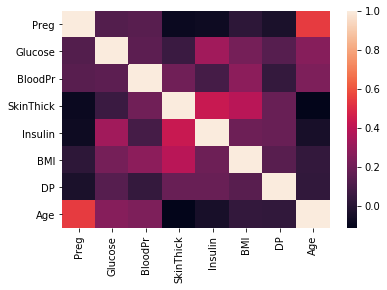

In [258]:
import seaborn as sns
%matplotlib inline
sns.heatmap(features.corr())

# Visualization of the variables

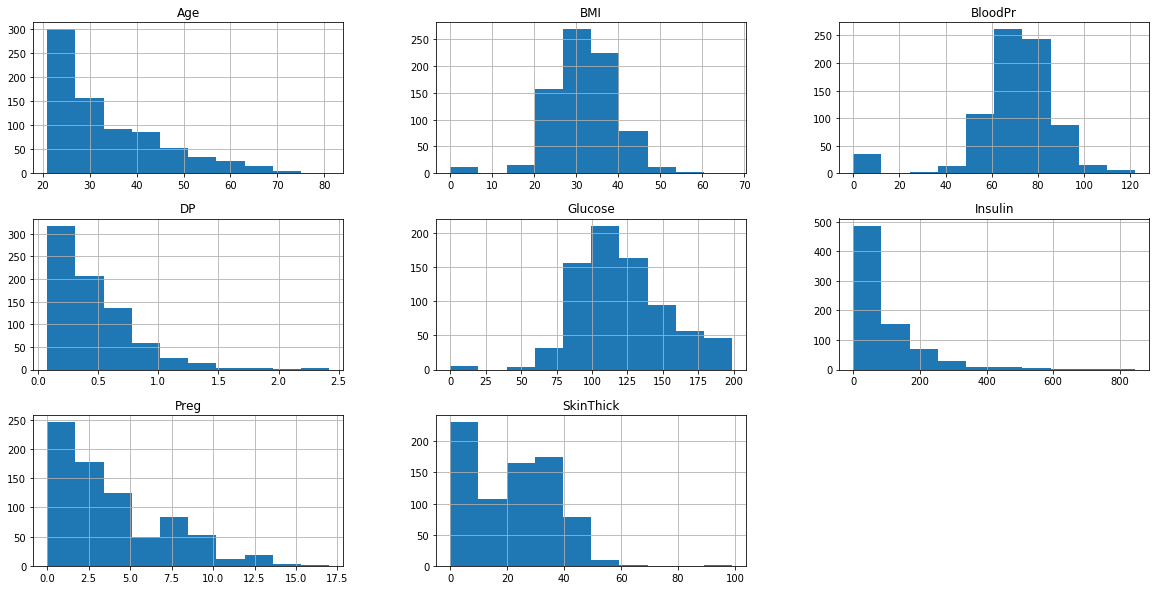

In [71]:
features.hist(figsize=(20,10))
plt.show()

# Model Training

In [72]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://jessesw.com/images/Rec_images/MaskTrain.png")

In [129]:

# splitting ratio 80: 20
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)



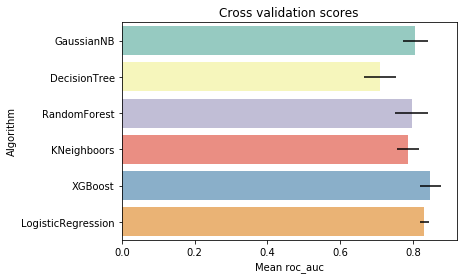

In [130]:
# Test differents algorithms 
kfold = StratifiedKFold (n_splits =5)
random_state = 42
classifiers = []
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(XGBClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["GaussianNB","DecisionTree",
"RandomForest","KNeighboors","XGBoost","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")

# Tuning the hyper-parameter estimators

# XGboost Gradient Boosting

In [139]:
xgb = GradientBoostingClassifier(random_state=random_state)

#xgb.get_params().keys()
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 128 out of 135 | elapsed:    6.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:    6.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n

In [140]:

xgb_best = grid_xgb.best_estimator_
# Best score
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 0.7850162866449512
Best parameters set: 
 {'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.5}


In [141]:

y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]

# 6.2 Logistic Regression

In [142]:

lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)
lr_param_grid  = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

grid_lr = GridSearchCV(lr, lr_param_grid)
grid_lr.fit(X_train, y_train)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbf

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.00...
       0.17782794, 0.19054607, 0.20417379, 0.21877616, 0.23442288,
       0.25118864, 0.26915348, 0.28840315, 0.30902954, 0.33113112,
       0.35481339, 0.3801894 , 0.40738028, 0.43651583, 0.46773514,
       0.50118723, 0.5370318 , 0.57543994, 0.616595  , 0.66069345,
       0.70794578, 0.7585

In [143]:

lr_best = grid_lr.best_estimator_
# Best score
print('Best Score:', grid_lr.best_score_)
print('Best parameters set: \n', grid_lr.best_params_)

Best Score: 0.7736156351791531
Best parameters set: 
 {'C': 0.09549925860214359, 'penalty': 'l1'}


In [144]:

y_pred_lr = lr_best.predict(X_test)
y_prob_lr = lr_best.predict_proba(X_test)[:,1]

# Random Forest


In [146]:
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   15.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False, random_state=42,
                      

In [147]:
rf_best = grid_rf.best_estimator_
# Best score
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 0.8459027449620017
Best parameters set: 
 {'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [148]:

y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

# GaussianNB

In [149]:
nb = GaussianNB()

nb_param_grid = {
   

}
grid_nb = GridSearchCV(nb, param_grid = nb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_nb.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=4, param_grid={}, pre_dispatch='2*n_jobs', refit=True,
             return_train_score=False, scoring='roc_auc', verbose=1)

In [150]:
# nb_best = grid_nb.best_estimator_
# Best score
print('Best Score:', grid_nb.best_score_)
print('Best parameters set: \n', grid_nb.best_params_)

Best Score: 0.8057589373807527
Best parameters set: 
 {}


In [151]:

y_pred_nb = nb_best.predict(X_test)
y_prob_nb = nb_best.predict_proba(X_test)[:,1]

# KNeighbors


In [152]:
### KNN classifier
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors':[4,8,16],
    'weights': ['uniform','distance']
}

grid_knn = GridSearchCV(knn, param_grid = knn_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [4, 8, 16],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [153]:
knn_best = grid_knn.best_estimator_
# Best score
print('Best Score:', grid_knn.best_score_)
print('Best parameters set: \n', grid_knn.best_params_)

Best Score: 0.8076596717961482
Best parameters set: 
 {'n_neighbors': 16, 'weights': 'distance'}


In [154]:
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:,1]

# Comparing the best models, We Calculate Confusion Matrix (Precision, Recall, Accuracy)


In [155]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score
y = df.values
def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['No','Yes']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0.00e+00 7.80e-02 8.40e-02 ... 6.80e+02 7.44e+02 8.46e+02]
GaussianNB
Accuracy is 0.7662337662337663
Precision is 0.6610169491525424
Recall is 0.7090909090909091
F1 score is 0.6842105263157895
ROC AUC is 0.8253443526170798


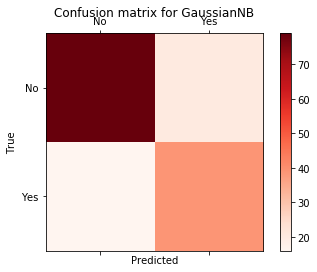

Logisitic Regression
Accuracy is 0.7597402597402597
Precision is 0.6730769230769231
Recall is 0.6363636363636364
F1 score is 0.6542056074766355
ROC AUC is 0.811386593204775


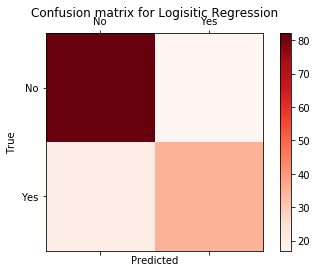

K-Nearest-Neighbors
Accuracy is 0.7337662337662337
Precision is 0.6458333333333334
Recall is 0.5636363636363636
F1 score is 0.6019417475728155
ROC AUC is 0.7764921946740129


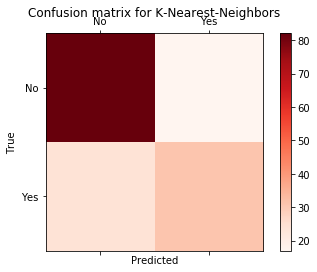

Random Forest
Accuracy is 0.7532467532467533
Precision is 0.6545454545454545
Recall is 0.6545454545454545
F1 score is 0.6545454545454545
ROC AUC is 0.8275482093663912


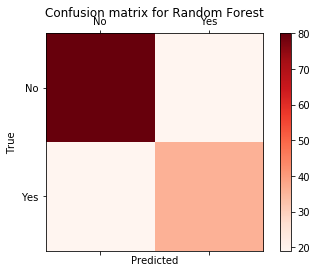

XGBoost Classifier
Accuracy is 0.7532467532467533
Precision is 0.6491228070175439
Recall is 0.6727272727272727
F1 score is 0.6607142857142858
ROC AUC is 0.8290174471992653


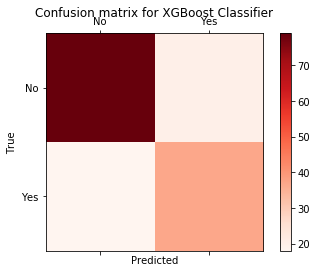

In [156]:

%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("GaussianNB", confusion_matrix(y_test, y_pred_nb), roc_auc_score(y_test, y_prob_nb)),
    ("Logisitic Regression", confusion_matrix(y_test, y_pred_lr), roc_auc_score(y_test, y_prob_lr)),
    ("K-Nearest-Neighbors", confusion_matrix(y_test, y_pred_knn), roc_auc_score(y_test, y_prob_knn)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), roc_auc_score(y_test, y_prob_rf)),
    ("XGBoost Classifier", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
    
]

draw_confusion_matrices(confusion_matrices)

# Model Evaluation  - Learning Graph

In this section, examine the performance of each of this variable using the learning curve. The learning curves constitute a great tool to diagnose bias and variance in any supervised learning algorithm. The curve can be used to detect the overfitting

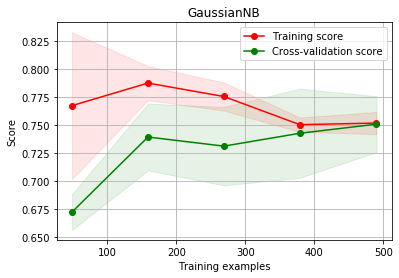

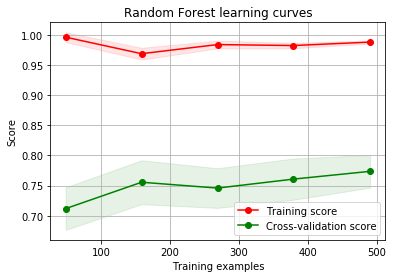

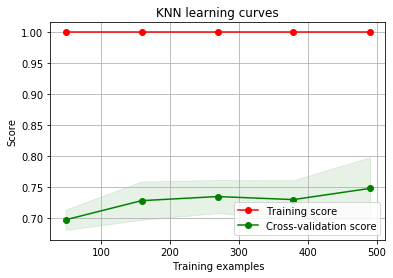

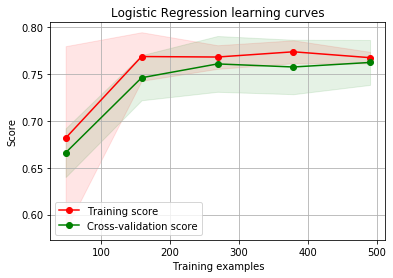

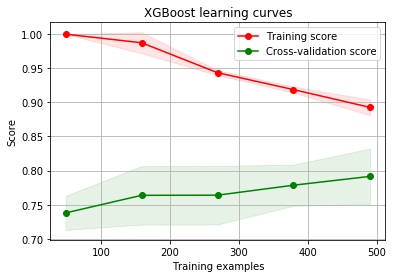

In [157]:
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_nb.best_estimator_,"GaussianNB",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_knn.best_estimator_,"KNN learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_lr.best_estimator_,"Logistic Regression learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

# Combined voting esembling


In [158]:

votingc = VotingClassifier(estimators=[('rf', rf_best), ('lr',lr_best),('knn', knn_best),
('nb', nb_best),('xgb',xgb_best)], voting='soft')
votingc = votingc.fit(X_train, y_train)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [160]:
y_pred_voting = votingc.predict(X_test)
y_prob_voting = votingc.predict_proba(X_test)[:,1]

Ensemble modeling
Accuracy is 0.7597402597402597
Precision is 0.6607142857142857
Recall is 0.6727272727272727
F1 score is 0.6666666666666666
ROC AUC is 0.8312213039485766


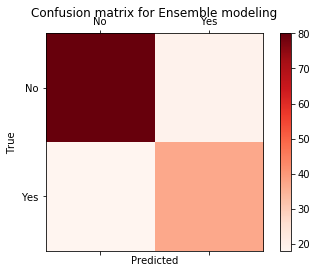

In [161]:

confusion_matrices = [
    ("Ensemble modeling", confusion_matrix(y_test, y_pred_voting), roc_auc_score(y_test, y_prob_voting))   
]
draw_confusion_matrices(confusion_matrices)

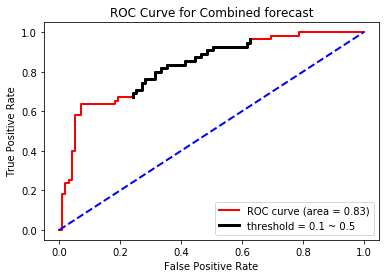

In [162]:

fpr, tpr, thresh = roc_curve(y_test, y_prob_voting, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_voting)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Combined forecast')
plt.legend(loc="lower right")
plt.show()

# Selected Best Model

In [218]:
from IPython.display import HTML, display
import tabulate
table = [['Test','NB','LR','KN','RF','XGt','Comb'],
        ['Accu',0.77,0.76,0.73,0.75,0.75,0.76],
        ['Prec',0.66,0.67,0.65,0.66,0.65,0.66],
        ['Reca',0.71,0.62,0.56,0.67,0.67,0.67],
        ['F1Sc',0.68,0.65,0.60,0.65,0.66,0.66],
        ['RocA',0.83,0.81,0.78,0.83,0.82,0.83]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

#(Where 
#'NB'= GaussianNB Classifier
#'LR'= Logistic Regression
#'KN'=  Knearest Neighbor
#'RF'= Random Forest
#'XG'= XBoost
#'Com'= Combined Voting

#'Accu' = Acuracy
#'Prec'= Precision
#'Reca' = Recall
#'FISc' = FI Score
#'RocA'= Roc Auc)

Test,NB,LR,KN,RF,XGt,Comb
Accu,0.77,0.76,0.73,0.75,0.75,0.76
Prec,0.66,0.67,0.65,0.66,0.65,0.66
Reca,0.71,0.62,0.56,0.67,0.67,0.67
F1Sc,0.68,0.65,0.6,0.65,0.66,0.66
RocA,0.83,0.81,0.78,0.83,0.82,0.83


# Model Scoring 

In [225]:
from sklearn.metrics import brier_score_loss
score_loss_voting = brier_score_loss(y_test, y_prob_voting)
print (' The score of Conbimed Voting', score_loss_voting ),
score_loss_Losgistic_Regression = brier_score_loss(y_test, y_prob_lr)
print ('The score of Logistic Regression', score_loss_Losgistic_Regression),
score_loss_GaussianNB = brier_score_loss(y_test, y_prob_nb)
print ('The score of GaussianNB', score_loss_GaussianNB),
score_loss_XGBoost = brier_score_loss(y_test, y_prob_xgb)
print ('The score of XGBoost', score_loss_XGBoost),
score_loss_Random_Forest = brier_score_loss(y_test, y_prob_rf)
print ('The score of Random Forest',score_loss_Random_Forest),
score_loss_Knearest_Neighbor = brier_score_loss(y_test, y_prob_knn)
print ('The score of Knearest Neighbor',score_loss_Knearest_Neighbor)




 The score of Conbimed Voting 0.15834447153682743
The score of Logistic Regression 0.1670170037040619
The score of GaussianNB 0.17182629531878837
The score of XGBoost 0.16388098858902597
The score of Random Forest 0.16369749271597167
The score of Knearest Neighbor 0.18016675677829416


# Naive_bayes - GaussianNB Classifier

In [166]:
from sklearn.metrics import classification_report
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_nb).ravel()
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_nb),'\n')

print ('True positives',tp)
print ('False positives',fp)
print ('True negatives',tn)
print ('False negatives',fn,'\n')

print('Classification Report')
print(classification_report(y_test, y_pred_nb),'\n')

Confusion Matrix
[[79 20]
 [16 39]] 

True positives 39
False positives 20
True negatives 79
False negatives 16 

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154
 



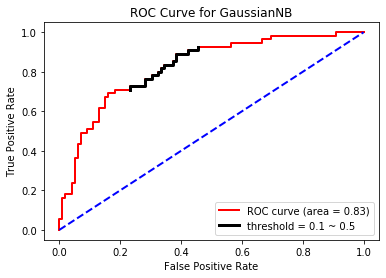

In [167]:

# make the ROC curve
fpr, tpr, thresh = roc_curve(y_test, y_prob_nb, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob_nb)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB')
plt.legend(loc="lower right")
plt.show()

In [ ]:
ROC CURVE = 83%
Pecsion = 66%
Recall = 71%
F1- Score = 68%

